In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
net=cv2.dnn.readNetFromDarknet('yolov3_custom.cfg','yolov3_custom_7000.weights')

In [31]:
classes = ['forks','glasses','plates','spoons']

In [46]:
my_img=cv2.imread('fork (6).jpg')


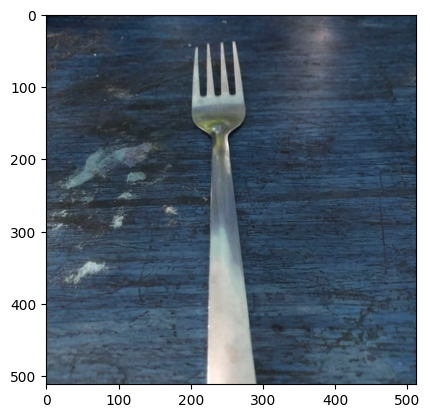

In [47]:
plt.imshow(my_img)

In [48]:
ht,wt,_=my_img.shape

In [49]:
blob=cv2.dnn.blobFromImage(my_img,1/255,(416,416),(0,0,0),swapRB=True,crop=False)

In [50]:
net.setInput(blob)

In [51]:
last_layer=net.getUnconnectedOutLayersNames()

In [52]:
layer_out=net.forward(last_layer)

In [53]:
boxes=[]
confidences=[]
class_ids=[]

for output in layer_out:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence > 0.6:
                         c_x=int(detection[0]*wt)
                         c_y=int(detection[1]*ht)
                         w=int(detection[2]*wt)
                         h=int(detection[3]*ht)
                         
                         x=int(c_x-w/2)
                         y=int(c_y-h/2)
                         
                         boxes.append([x,y,w,h])
                         confidences.append((float(confidence)))
                         class_ids.append(class_id)
                         

In [54]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))

In [55]:
if  len(indexes)>0:    
    for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
            cv2.putText(my_img,label + " " + confidence, (x,y+400),font,2,color,2)
            
cv2.imshow('img',my_img)
cv2.waitKey(0) 

cv2.destroyAllWindows()